In [63]:
from selenium import webdriver
import selenium
from bs4 import BeautifulSoup
from PIL import Image
import time
import requests
import numpy as np
import os
from sklearn import svm
%matplotlib inline
import matplotlib.pyplot as plt
import re
#from imgaug import augmenters as iaa
#import imgaug as ia
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [67]:
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [atoi(c) for c in re.split('(\d+)', text) ]


In [9]:
driver = webdriver.Chrome('Desktop/ntumath/chromedriver')

In [10]:
driver2 = webdriver.Chrome('Desktop/ntumath/chromedriver')

In [11]:
el=driver.find_elements_by_xpath("//*[@id='facebook']/body/div[21]/div[2]/div/div/div/div/div[2]/div")[0]

bf = BeautifulSoup(driver2.page_source,'html.parser')
table = bf.findAll('tbody')[0].findAll('tr')[1:-2]

ans = []

for row in table:
    for col in range(9):
        ans.append(int(row.findAll('td')[col].findAll('input')[0]['value']))

for row in range(1,10):
    for col in range(1,10):
        action = webdriver.common.action_chains.ActionChains(driver)
        action.move_to_element_with_offset(el, 45*(col-1)+55, 50*(row-1)+200)
        action.click()
        action.move_to_element_with_offset(el, 55*(ans[(row-1)*9+col-1]-1)+20, 700)
        action.click()
        action.move_to_element_with_offset(el, 45*(col-1)+55, 50*(row-1)+200)
        action.click()
        action.perform()



http://shareweblink.com/sudoku/
    

In [99]:
action = webdriver.common.action_chains.ActionChains(driver)
action.move_to_element_with_offset(el, 20, 700)
action.click()
action.perform()

In [40]:
el=driver.find_elements_by_xpath("//*[@id='facebook']/body/div[21]/div[2]/div/div/div/div/div[2]/div/div")[0]
location = el.location
size = el.size
driver.save_screenshot('Desktop/test.png')
im = Image.open('Desktop/test.png') # uses PIL library to open image in memory

left = location['x'] + 392
top = location['y'] + 263
right = location['x'] + size['width'] + 644
bottom = location['y'] + 828


im = im.crop((left, top, right, bottom)) # defines crop points
im.save('Desktop/screenshot.png') # saves new cropped image

In [4]:
im = Image.open('Desktop/screenshot.png')
left = 8
right = left + 50
top = 8
bottom = top + 50

In [71]:
for i in range(1,10):
    for j in range(1,10):
        im_cell = im.crop((left, top, right, bottom))
        im_cell.save('Desktop/test/'+str(9*(i-1)+j)+'.png')
        if j == 3:
            left = left + 66
        elif j == 9:
            left = 8
        else:
            left = left + 62
        right = left + 50
    if i == 3:
        top = top + 66
    else:
        top = top + 62
    bottom = top + 50

In [101]:
dataset = []

In [93]:
for i,pic in enumerate(os.listdir('Desktop/number recnog/')):
    if i == 0:
        pass
    else:
        im = Image.open('Desktop/number recnog/'+pic).convert('L')
        digit = np.asmatrix(im)
        digit = digit.getA1()
        dataset.append(digit)

In [102]:
for image in trainset:
    digit = np.asmatrix(image)
    digit = digit.getA1()
    dataset.append(digit)

In [103]:
clf = svm.SVC()
clf.fit(dataset, label) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [104]:
testdata = []
for i,pic in enumerate(list1):
    if i == 81:
        pass
    else:
        im = Image.open('Desktop/number_recognition/testdata/'+pic).convert('L')
        digit = np.asmatrix(im)
        digit = digit.getA1()
        testdata.append(digit)

In [105]:
ans = clf.predict(testdata)
print(ans)

[4 4 0 3 0 4 4 0 0 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0
 4 4 4 0 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 0 4
 0 4 0 4 4 0 4]


In [106]:
for i in range(1,9):
    print(ans[9*(i-1):9*i])

[4 4 0 3 0 4 4 0 0]
[4 4 1 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4]
[0 4 4 4 0 4 4 4 0]
[4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 1 4]
[4 4 4 4 4 4 4 4 4]


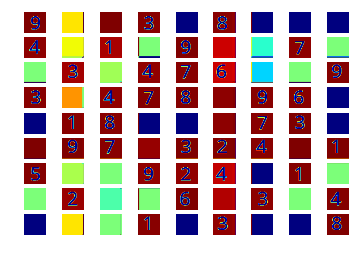

In [68]:
list1 = os.listdir('Desktop/number_recognition/testdata/')
list1.sort(key=natural_keys)
for i,pic in enumerate(list1):
    if i != 81:
        im = Image.open('Desktop/number_recognition/testdata/'+pic).convert('L')
        digit = np.asarray(im)
        plt.subplot(9,9,i+1)
        plt.axis('off')
        plt.imshow(digit)
    else:
        pass

In [68]:
seq = iaa.Sequential([
        iaa.Affine(translate_px={"x":-15,"y":6})
    ])
images_aug = seq.augment_images(trainset)
digit = np.asarray(images_aug)

In [107]:
label

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5,

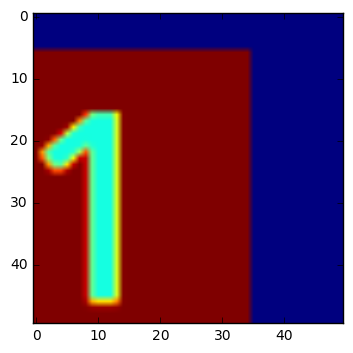

In [69]:
plt.imshow(images_aug[0])

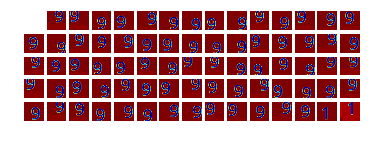

In [95]:
trainset = []
label = []
for num in range(0,10,1):
    for i,pic in enumerate(os.listdir('Desktop/number_recognition/traindata/'+str(num)+'/')):
        if i == 0:
            pass
        else:
            im = Image.open('Desktop/number_recognition/traindata/'+str(num)+'/'+pic).convert('L')
            digit = np.asarray(im)
            trainset.append(digit)
            label.append(num)
            plt.subplot(10,15,i+1)
            plt.axis('off')
            plt.imshow(digit)

650

In [83]:
label = []
for i in range(1,10,1):
    if i == 4 or i == 8:
        label = label + [i]*71
    else:
        label = label + [i]*72
label = label + [0]*2

In [98]:
label = np.array(label)

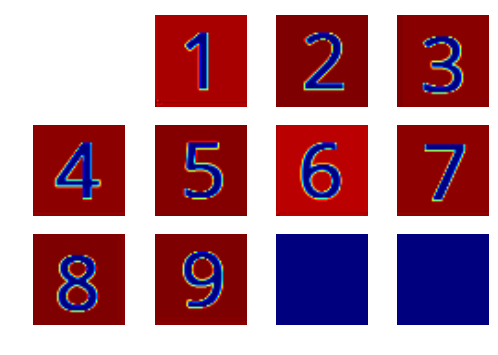

In [121]:
for i,pic in enumerate(os.listdir('Desktop/number_recognition/traindata/')):
    if i == 0:
        pass
    else:
        im = Image.open('Desktop/number_recognition/traindata/'+pic).convert('L')
        digit = np.asarray(im)
        trainset.append(digit)
        plt.subplot(3,4,i+1)
        plt.axis('off')
        plt.imshow(digit)
    

# 增加Traindata

In [94]:
datagen = ImageDataGenerator(
        width_shift_range=0.25,
        height_shift_range=0.25,
        horizontal_flip=False,
        fill_mode='nearest')
for num in range(1,10,1):
    img = load_img('Desktop/number_recognition/traindata/'+str(num)+'/'+str(num)+'.png')
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='Desktop/number_recognition/traindata/'+str(num)+'/', save_prefix='1', save_format='png'):
        i += 1
        if i > 70:
            break